In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

In [2]:
import matplotlib.pyplot as pl
import seaborn as sns

In [3]:
from datetime import datetime

In [4]:
df=pd.read_csv('LoanStats3a_new.csv')
df.head()

/Users/tessa/miniconda3/envs/thesis2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,Dec-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,

In [3]:
df['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [74]:
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [75]:
df.shape

(42542, 145)

In [76]:
df1 = df[['loan_status', 'funded_amnt', 'term', 'grade', 'emp_length', 'home_ownership', 
          'annual_inc', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'dti', 
          'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
          'revol_util', 'total_pymnt', 'application_type']]
df1 = df1[df1['application_type']=='Individual']
df1.drop(columns=['application_type'], inplace=True)

In [77]:
df1.shape

(42535, 18)

In [78]:
df1.dropna(how='any', inplace=True)
df1.shape

(41336, 18)

In [79]:
## filtering loan status
df1['loan_status'].value_counts()

Fully Paid                                             33236
Charged Off                                             5425
Does not meet the credit policy. Status:Fully Paid      1935
Does not meet the credit policy. Status:Charged Off      740
Name: loan_status, dtype: int64

In [80]:
df1['loan_status'] = [1 if x in ['Fully Paid'] else 0 for x in df1['loan_status']]
df1['loan_status'].value_counts()

1    33236
0     8100
Name: loan_status, dtype: int64

In [81]:
8100/(8100+33236)

0.19595509967098898

In [82]:
## changing years - credit years
df1.earliest_cr_line = pd.to_datetime(df1.earliest_cr_line)
df1.issue_d = pd.to_datetime(df1.issue_d)
df1['credit_years'] = df1['issue_d'].sub(df1['earliest_cr_line'])
df1['credit_years']=df1['credit_years']/ np.timedelta64(1, 'Y')
df1.head()

,loan_status,funded_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_pymnt,credit_years
0,1,5000.0,36 months,B,10+ years,RENT,24000.0,Verified,2011-12-01,credit_card,AZ,27.65,0.0,1985-01-01,1.0,3.0,83.7%,5863.155187,26.913626
1,0,2500.0,60 months,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,car,GA,1.00,0.0,1999-04-01,5.0,3.0,9.4%,1014.530000,12.668296
2,1,2400.0,36 months,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,small_business,IL,8.72,0.0,2001-11-01,2.0,2.0,98.5%,3005.666844,10.080974
3,1,10000.0,36 months,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,other,CA,20.00,0.0,1996-02-01,1.0,10.0,21%,12231.890000,15.830578
4,1,3000.0,60 months,B,1 year,RENT,80000.0,Source Verified,2011-12-01,other,OR,17.94,0.0,1996-01-01,0.0,15.0,53.9%,4066.908161,15.915453


In [83]:
df1 = df1.round({'credit_years':0})
df1.head()

,loan_status,funded_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_pymnt,credit_years
0,1,5000.0,36 months,B,10+ years,RENT,24000.0,Verified,2011-12-01,credit_card,AZ,27.65,0.0,1985-01-01,1.0,3.0,83.7%,5863.155187,27.0
1,0,2500.0,60 months,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,car,GA,1.00,0.0,1999-04-01,5.0,3.0,9.4%,1014.530000,13.0
2,1,2400.0,36 months,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,small_business,IL,8.72,0.0,2001-11-01,2.0,2.0,98.5%,3005.666844,10.0
3,1,10000.0,36 months,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,other,CA,20.00,0.0,1996-02-01,1.0,10.0,21%,12231.890000,16.0
4,1,3000.0,60 months,B,1 year,RENT,80000.0,Source Verified,2011-12-01,other,OR,17.94,0.0,1996-01-01,0.0,15.0,53.9%,4066.908161,16.0


In [84]:
df1.drop(columns=['earliest_cr_line', 'issue_d'], inplace=True)

In [85]:
df1['funded_amnt'].describe()

count    41336.000000
mean     10900.506822
std       7152.246795
min        500.000000
25%       5275.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [86]:
df1['term'].value_counts()

 36 months    30616
 60 months    10720
Name: term, dtype: int64

In [87]:
df1['grade'].value_counts()

B    12032
A     9778
C     8539
D     5876
E     3331
F     1273
G      507
Name: grade, dtype: int64

In [88]:
df1['emp_length'].value_counts()

10+ years    9365
< 1 year     5029
2 years      4736
3 years      4358
4 years      3640
1 year       3584
5 years      3453
6 years      2371
7 years      1872
8 years      1589
9 years      1339
Name: emp_length, dtype: int64

In [89]:
df1['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df1['emp_length'] = df1['emp_length'].astype(int)
df1['emp_length'].value_counts()

10    9365
1     8613
2     4736
3     4358
4     3640
5     3453
6     2371
7     1872
8     1589
9     1339
Name: emp_length, dtype: int64

In [90]:
df1['home_ownership'].value_counts()

RENT        19701
MORTGAGE    18475
OWN          3022
OTHER         134
NONE            4
Name: home_ownership, dtype: int64

In [91]:
df1['home_ownership'] = df1['home_ownership'].replace('NONE','OTHER')
df1['home_ownership'].value_counts()

RENT        19701
MORTGAGE    18475
OWN          3022
OTHER         138
Name: home_ownership, dtype: int64

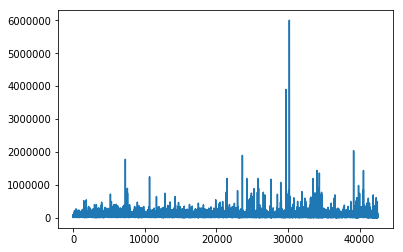

In [92]:
df1['annual_inc'].plot()

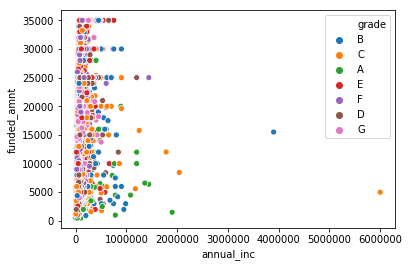

In [93]:
sns.scatterplot(x='annual_inc',y='funded_amnt', hue='grade', data=df1)

In [97]:
print(df1.shape)
df2 = df1[df1['annual_inc']<=200000]
print(df2.shape)

(41336, 17)
(40662, 17)


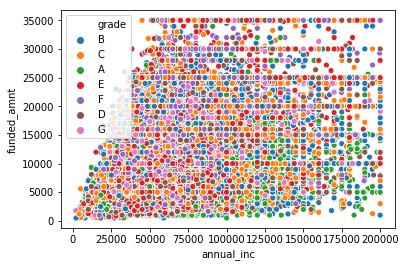

In [98]:
sns.scatterplot(x='annual_inc',y='funded_amnt', hue='grade', data=df2)

In [99]:
df2['verification_status'].value_counts()

Not Verified       18076
Verified           12671
Source Verified     9915
Name: verification_status, dtype: int64

In [100]:
df2['purpose'].value_counts()

debt_consolidation    19111
credit_card            5274
other                  4138
home_improvement       2970
major_purchase         2196
small_business         1888
car                    1544
wedding                 976
medical                 705
moving                  593
educational             408
house                   398
vacation                367
renewable_energy         94
Name: purpose, dtype: int64

In [101]:
df2.replace({'purpose' : { 'debt_consolidation' : 'debt', 'credit_card' : 'debt', 
                          'other': 'purchase', 'home_improvement':'purchase', 
                          'major_purchase':'purchase', 'car':'purchase', 'wedding':'purchase',
                          'medical':'purchase', 'moving':'purchase','house':'purchase',
                          'vacation':'purchase', 'renewable_energy':'purchase'}}, 
                           inplace=True)
df2['purpose'].value_counts()

debt              24385
purchase          13981
small_business     1888
educational         408
Name: purpose, dtype: int64

In [102]:
df2['addr_state'].value_counts()

CA    7117
NY    3862
FL    2961
TX    2802
NJ    1900
IL    1601
PA    1595
VA    1437
GA    1437
MA    1370
OH    1279
MD    1078
AZ     868
WA     838
CO     820
NC     793
CT     764
MI     753
MO     731
MN     625
NV     503
WI     494
SC     473
AL     460
OR     451
LA     441
KY     351
OK     309
KS     282
UT     266
AR     245
DC     220
RI     202
NM     194
WV     177
NH     174
HI     174
DE     131
MT      86
AK      83
WY      82
SD      65
VT      57
TN      31
MS      26
IN      19
IA      12
NE      11
ID       9
ME       3
Name: addr_state, dtype: int64

In [103]:
# following https://rstudio-pubs-static.s3.amazonaws.com/203258_d20c1a34bc094151a0a1e4f4180c5f6f.html
a = df2.addr_state.unique().tolist()
a = [i for i in a if i not in ["IL", "TX", "CA", "GA", "FL", "NY"]]
df2.loc[df2.addr_state.isin(a), 'addr_state'] = 'Other'
df2['addr_state'].value_counts()

Other    20882
CA        7117
NY        3862
FL        2961
TX        2802
IL        1601
GA        1437
Name: addr_state, dtype: int64

In [104]:
df2['dti'].describe()

count    40662.000000
mean        13.466589
std          6.704862
min          0.000000
25%          8.330000
50%         13.570000
75%         18.750000
max         29.990000
Name: dti, dtype: float64

In [105]:
df2['delinq_2yrs'].value_counts()

0.0     36144
1.0      3440
2.0       727
3.0       233
4.0        68
5.0        25
6.0        13
7.0         6
8.0         3
13.0        1
11.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

In [ ]:
# can binarize it
#df2['delinq_2yrs'] = df2['delinq_2yrs'].apply(lambda x: ['yes' if y >= 1.0 else 'No' for y in x])

In [106]:
df2['inq_last_6mths'].value_counts()

0.0     18830
1.0     10767
2.0      5731
3.0      3034
4.0       997
5.0       574
6.0       319
7.0       168
8.0       110
9.0        43
10.0       23
12.0       15
11.0       15
15.0        8
13.0        6
14.0        5
18.0        4
24.0        2
17.0        2
19.0        2
28.0        1
33.0        1
27.0        1
31.0        1
16.0        1
32.0        1
20.0        1
Name: inq_last_6mths, dtype: int64

In [107]:
df2['revol_util'].describe()

count     40662
unique     1116
top          0%
freq       1005
Name: revol_util, dtype: object

In [108]:
df2['revol_util'].value_counts()

0%        1005
40.7%       63
0.2%        63
63%         62
66.6%       61
70.4%       59
64.6%       58
66.7%       58
68.6%       57
37.6%       57
0.1%        57
78.7%       57
48%         56
46.6%       56
55.8%       56
46.4%       56
35.3%       56
64.8%       56
70.1%       56
54.6%       56
61%         56
76.6%       56
57.7%       56
55.2%       55
66.9%       55
54.3%       55
25.5%       55
31.2%       55
48.9%       55
62.8%       54
          ... 
0.83%        1
57.56%       1
7.43%        1
104.3%       1
1.88%        1
52.58%       1
33.39%       1
43.61%       1
24.65%       1
34.89%       1
27.81%       1
106.4%       1
108.8%       1
106.2%       1
24.63%       1
103.2%       1
28.41%       1
105.2%       1
101.5%       1
21.59%       1
106.1%       1
0.86%        1
8.01%        1
104.2%       1
10.17%       1
10.61%       1
8.46%        1
8.58%        1
77.63%       1
47.36%       1
Name: revol_util, Length: 1116, dtype: int64

In [109]:
df2['revol_util'] = df2['revol_util'].astype(str).str.extract('(\d+)').astype(float)
df2['revol_util'].value_counts()

/home/raam/anaconda3/envs/newvenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.0      1438
54.0      489
55.0      483
66.0      483
57.0      475
48.0      468
70.0      465
64.0      461
49.0      459
46.0      458
51.0      453
61.0      448
41.0      446
60.0      445
59.0      444
56.0      443
33.0      440
44.0      440
38.0      439
47.0      438
80.0      438
40.0      435
45.0      435
67.0      432
43.0      432
63.0      432
68.0      432
37.0      431
73.0      431
62.0      430
         ... 
88.0      349
9.0       349
15.0      348
95.0      343
5.0       342
86.0      342
97.0      333
11.0      328
20.0      324
16.0      323
1.0       323
6.0       323
2.0       323
3.0       322
91.0      317
96.0      317
4.0       314
13.0      300
10.0      299
98.0      287
99.0      269
100.0       6
101.0       6
103.0       4
106.0       4
105.0       3
104.0       2
102.0       2
119.0       1
108.0       1
Name: revol_util, Length: 109, dtype: int64

In [110]:
df2['revol_util'].describe()

count    40662.000000
mean        48.804707
std         28.279987
min          0.000000
25%         26.000000
50%         49.000000
75%         72.000000
max        119.000000
Name: revol_util, dtype: float64

In [111]:
df2.head()

,loan_status,funded_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_pymnt,credit_years
0,1,5000.0,36 months,B,10,RENT,24000.0,Verified,debt,Other,27.65,0.0,1.0,3.0,83.0,5863.155187,27.0
1,0,2500.0,60 months,C,1,RENT,30000.0,Source Verified,purchase,GA,1.00,0.0,5.0,3.0,9.0,1014.530000,13.0
2,1,2400.0,36 months,C,10,RENT,12252.0,Not Verified,small_business,IL,8.72,0.0,2.0,2.0,98.0,3005.666844,10.0
3,1,10000.0,36 months,C,10,RENT,49200.0,Source Verified,purchase,CA,20.00,0.0,1.0,10.0,21.0,12231.890000,16.0
4,1,3000.0,60 months,B,1,RENT,80000.0,Source Verified,purchase,Other,17.94,0.0,0.0,15.0,53.0,4066.908161,16.0


In [112]:
df2['open_acc'].value_counts()
#df1.drop(columns=['application_type'], inplace=True)

7.0     4109
8.0     4016
6.0     4008
9.0     3779
10.0    3250
5.0     3220
11.0    2818
4.0     2397
12.0    2301
13.0    1952
14.0    1522
3.0     1520
15.0    1231
16.0     980
17.0     763
2.0      632
18.0     559
19.0     419
20.0     321
21.0     263
22.0     159
23.0     111
24.0      77
25.0      62
1.0       34
26.0      28
28.0      28
27.0      28
30.0      17
29.0      13
31.0      12
34.0       8
32.0       6
35.0       4
33.0       4
38.0       2
36.0       2
41.0       1
46.0       1
39.0       1
47.0       1
44.0       1
37.0       1
42.0       1
Name: open_acc, dtype: int64

In [113]:
df2.columns

Index(['loan_status', 'funded_amnt', 'term', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'revol_util', 'total_pymnt', 'credit_years'],
      dtype='object')

In [114]:
df3 = df2.drop(columns=['term', 'verification_status', 'delinq_2yrs', 'inq_last_6mths', 
                  'total_pymnt'])

In [115]:
df3.shape

(40662, 12)

In [116]:
df3.columns

Index(['loan_status', 'funded_amnt', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'addr_state', 'dti', 'open_acc', 'revol_util',
       'credit_years'],
      dtype='object')

In [117]:
df3.head()

,loan_status,funded_amnt,grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,open_acc,revol_util,credit_years
0,1,5000.0,B,10,RENT,24000.0,debt,Other,27.65,3.0,83.0,27.0
1,0,2500.0,C,1,RENT,30000.0,purchase,GA,1.00,3.0,9.0,13.0
2,1,2400.0,C,10,RENT,12252.0,small_business,IL,8.72,2.0,98.0,10.0
3,1,10000.0,C,10,RENT,49200.0,purchase,CA,20.00,10.0,21.0,16.0
4,1,3000.0,B,1,RENT,80000.0,purchase,Other,17.94,15.0,53.0,16.0


In [119]:
df3['loan_status'].value_counts()

1    32716
0     7946
Name: loan_status, dtype: int64

In [120]:
df3.to_csv('lending_club_new.csv')

In [ ]:
https://github.com/steve-liang/LCAnalytics
https://gist.github.com/kevindavenport/998c9ec12706ab9a2ef0#file-lending_club_python-ipynb
https://rstudio-pubs-static.s3.amazonaws.com/203258_d20c1a34bc094151a0a1e4f4180c5f6f.html
https://rpubs.com/jfdarre/119147
https://nbviewer.jupyter.org/gist/odubno/0b767a47f75adb382246
http://rpubs.com/aepoetry/classification_treeforest

In [125]:
df3['revol_util'].value_counts()

0.0      1438
54.0      489
55.0      483
66.0      483
57.0      475
48.0      468
70.0      465
64.0      461
49.0      459
46.0      458
51.0      453
61.0      448
41.0      446
60.0      445
59.0      444
56.0      443
33.0      440
44.0      440
38.0      439
47.0      438
80.0      438
40.0      435
45.0      435
67.0      432
43.0      432
63.0      432
68.0      432
37.0      431
73.0      431
62.0      430
         ... 
88.0      349
9.0       349
15.0      348
95.0      343
5.0       342
86.0      342
97.0      333
11.0      328
20.0      324
16.0      323
1.0       323
6.0       323
2.0       323
3.0       322
91.0      317
96.0      317
4.0       314
13.0      300
10.0      299
98.0      287
99.0      269
100.0       6
101.0       6
103.0       4
106.0       4
105.0       3
104.0       2
102.0       2
119.0       1
108.0       1
Name: revol_util, Length: 109, dtype: int64

In [128]:
df4 = pd.read_csv('lending_club_new.csv')  
df4.head()

,Unnamed: 0,loan_status,funded_amnt,grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,open_acc,revol_util,credit_years
0,0,1,5000.0,B,10,RENT,24000.0,debt,Other,27.65,3.0,83.0,27.0
1,1,0,2500.0,C,1,RENT,30000.0,purchase,GA,1.00,3.0,9.0,13.0
2,2,1,2400.0,C,10,RENT,12252.0,small_business,IL,8.72,2.0,98.0,10.0
3,3,1,10000.0,C,10,RENT,49200.0,purchase,CA,20.00,10.0,21.0,16.0
4,4,1,3000.0,B,1,RENT,80000.0,purchase,Other,17.94,15.0,53.0,16.0


In [129]:
df4 = df4.loc[:,['funded_amnt', 'emp_length', 'annual_inc', 'dti', 'open_acc', 'revol_util', 'credit_years', 'grade', 'home_ownership', 'purpose', 'addr_state', 'loan_status']]
df4.head()

,funded_amnt,emp_length,annual_inc,dti,open_acc,revol_util,credit_years,grade,home_ownership,purpose,addr_state,loan_status
0,5000.0,10,24000.0,27.65,3.0,83.0,27.0,B,RENT,debt,Other,1
1,2500.0,1,30000.0,1.00,3.0,9.0,13.0,C,RENT,purchase,GA,0
2,2400.0,10,12252.0,8.72,2.0,98.0,10.0,C,RENT,small_business,IL,1
3,10000.0,10,49200.0,20.00,10.0,21.0,16.0,C,RENT,purchase,CA,1
4,3000.0,1,80000.0,17.94,15.0,53.0,16.0,B,RENT,purchase,Other,1


In [130]:
df4.drop(columns=['funded_amnt', 'dti', 'revol_util'], inplace=True)
df4.head()

,emp_length,annual_inc,open_acc,credit_years,grade,home_ownership,purpose,addr_state,loan_status
0,10,24000.0,3.0,27.0,B,RENT,debt,Other,1
1,1,30000.0,3.0,13.0,C,RENT,purchase,GA,0
2,10,12252.0,2.0,10.0,C,RENT,small_business,IL,1
3,10,49200.0,10.0,16.0,C,RENT,purchase,CA,1
4,1,80000.0,15.0,16.0,B,RENT,purchase,Other,1


In [131]:
df4.to_csv('lending_club_small.csv')